## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

The meaning of the different columns can be found here: https://www.kaggle.com/tonypriyanka2913/employee-absenteeism

In [ ]:
#Setup dataframe and visualizations
import math
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


#Figure set up for dark theme:
plt.style.use(['dark_background'])
#Color to set all my graphs.
color = '#F9EDF5'
sns.set()

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [ ]:
absent.shape

(740, 21)

In [ ]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categorical variables that are correlated, you often want to keep the one with fewer unique values. Why might that be? (Think about the cons of KNN.)

In [ ]:
def the_best_map(corr):
  mask = np.zeros_like(corr)
  mask[np.triu_indices_from(mask)] = False
  with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(data=corr, annot=True, square=True, fmt='.1g', center=0.7, mask=mask, vmin=0, vmax=1)
  plt.show()

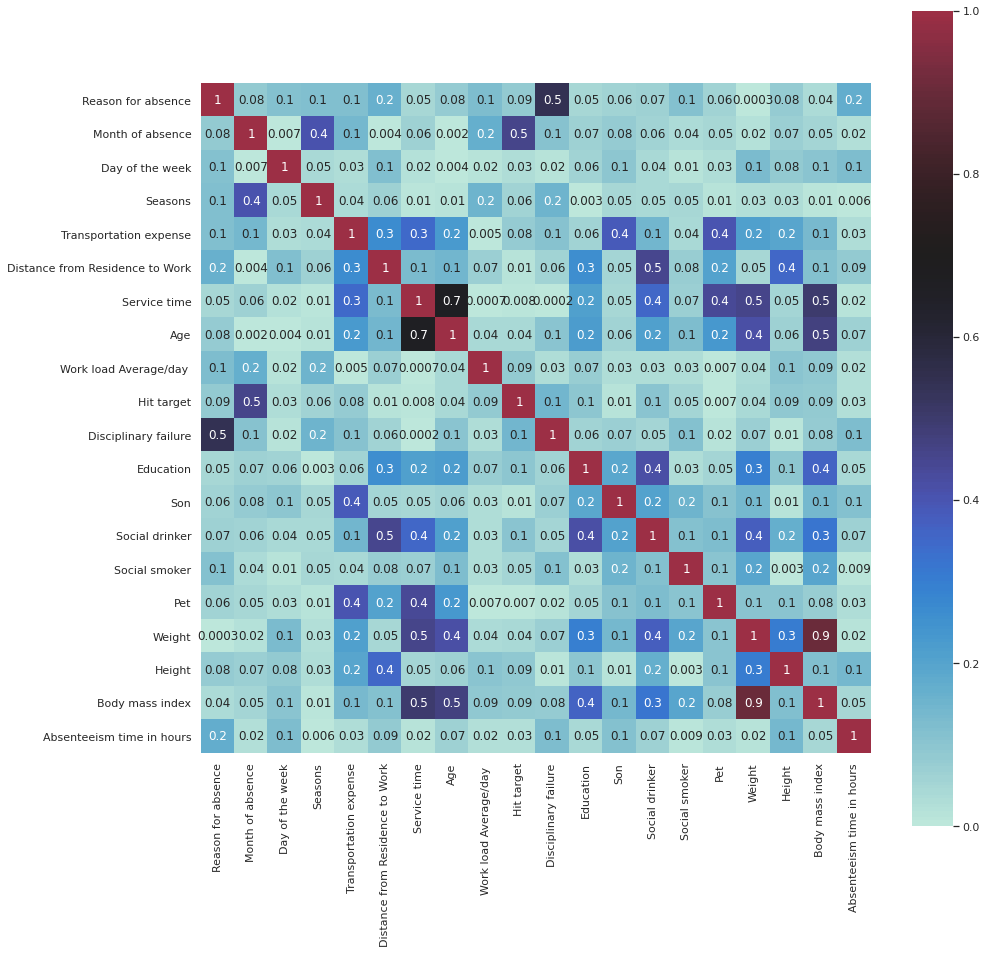

In [ ]:
# answer below:
corr = absent.drop(columns=['ID'])
corr = abs(corr.corr())
the_best_map(corr)


In [ ]:
drop = ['ID', 'Weight', 'Age', 'Height', 'Body mass index', 'Reason for absence', 'Work load Average/day ']
df = absent.drop(columns=drop)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def corr_id(X):
  # VIF dataframe 
  vif_data = pd.DataFrame() 
  vif_data["feature"] = X.columns 
    
  # calculating VIF for each feature 
  vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                            for i in range(len(X.columns))] 
  #Print the vif_data  
  #print(vif_data)
  return vif_data
  


In [ ]:
vif_data = corr_id(df)
#Print the vif_data with a score >=10 - those are the ones we're looking at to remove. 
vif_drop = vif_data[vif_data['VIF'] > 10].sort_values(by='VIF')

In [ ]:
print("Weight: ", absent['Weight'].nunique(), "BMI: ", absent['Body mass index'].nunique())
print("Age: ", absent['Age'].nunique(), "Service Time: ", absent['Service time'].nunique())
print("Height: ", absent['Height'].nunique(), "Hit target: ", absent['Hit target'].nunique())

Weight:  26 BMI:  17
Age:  22 Service Time:  18
Height:  14 Hit target:  13


In [ ]:
absent[vif_drop['feature']].nunique()
vif_drop = vif_drop[vif_drop['feature'] != 'Hit target']
df.drop(columns = vif_drop['feature'], inplace=True)
df.describe()

,Month of absence,Day of the week,Seasons,Distance from Residence to Work,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,6.324324,3.914865,2.544595,29.631081,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,6.924324
std,3.436287,1.421675,1.111831,14.836788,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,13.330998
min,0.000000,2.000000,1.000000,5.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,16.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,6.000000,4.000000,3.000000,26.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000
75%,9.000000,5.000000,4.000000,50.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,8.000000
max,12.000000,6.000000,4.000000,52.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,120.000000


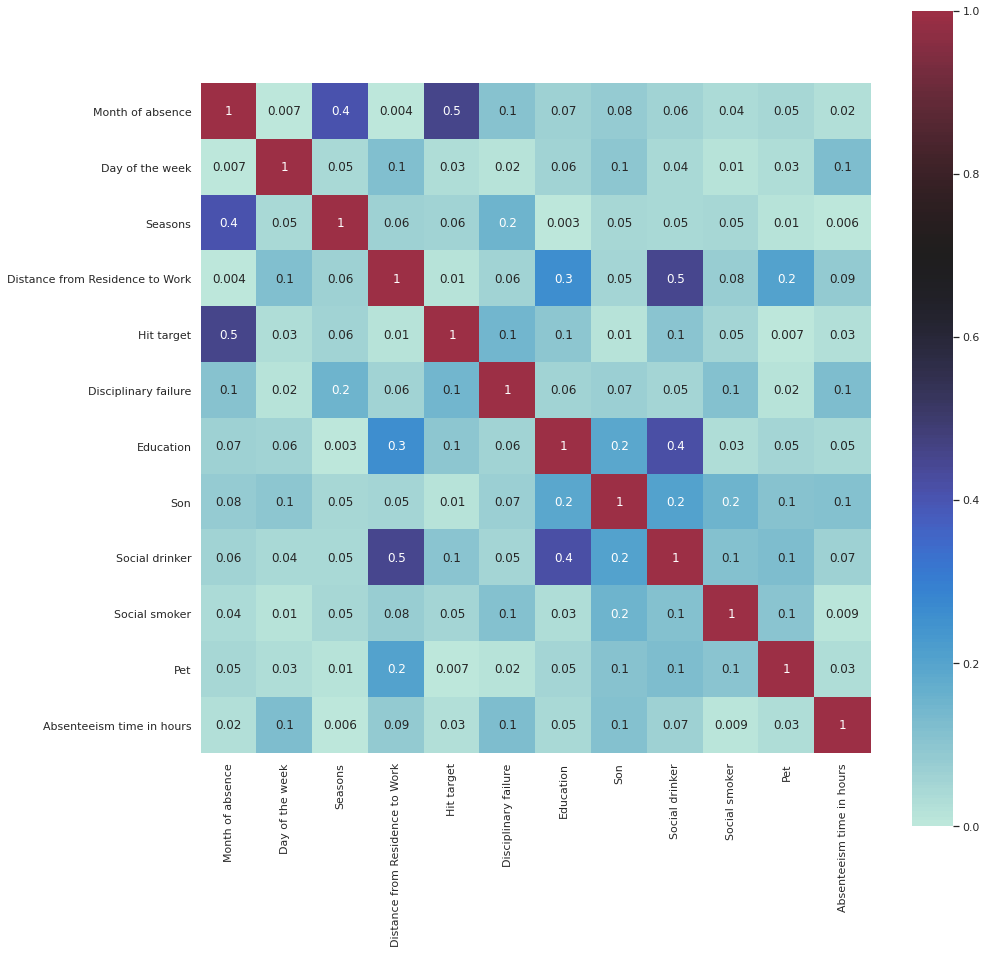

In [ ]:
the_best_map(abs(df.corr()))

In [ ]:
print(corr_id(df))

                            feature        VIF
0                  Month of absence   5.204452
1                   Day of the week   9.097020
2                           Seasons   7.853655
3   Distance from Residence to Work   7.301412
4                        Hit target  25.252806
5              Disciplinary failure   1.144483
6                         Education   5.938459
7                               Son   2.149964
8                    Social drinker   3.781670
9                     Social smoker   1.163654
10                              Pet   1.540385
11        Absenteeism time in hours   1.365842


In [ ]:
df = df.drop(columns=['Social drinker', 'Social smoker', 'Day of the week', 'Seasons', 'Education'])
print(corr_id(df))

                           feature       VIF
0                 Month of absence  4.205770
1  Distance from Residence to Work  5.248750
2                       Hit target  8.561943
3             Disciplinary failure  1.099113
4                              Son  1.938435
5                              Pet  1.396722
6        Absenteeism time in hours  1.327129


Figure out which columns actually contain sneaky categorical variables and turn those into dummy variables.

In [ ]:
# answer below:
df.nunique()

Month of absence                   13
Distance from Residence to Work    25
Hit target                         13
Disciplinary failure                2
Son                                 5
Pet                                 6
Absenteeism time in hours          19
dtype: int64

In [ ]:
df.describe(include='all')

,Month of absence,Distance from Residence to Work,Hit target,Disciplinary failure,Son,Pet,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,6.324324,29.631081,94.587838,0.054054,1.018919,0.745946,6.924324
std,3.436287,14.836788,3.779313,0.226277,1.098489,1.318258,13.330998
min,0.000000,5.000000,81.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,16.000000,93.000000,0.000000,0.000000,0.000000,2.000000
50%,6.000000,26.000000,95.000000,0.000000,1.000000,0.000000,3.000000
75%,9.000000,50.000000,97.000000,0.000000,2.000000,1.000000,8.000000
max,12.000000,52.000000,100.000000,1.000000,4.000000,8.000000,120.000000


In [ ]:
df = pd.get_dummies(df, drop_first=True)
df

,Month of absence,Distance from Residence to Work,Hit target,Disciplinary failure,Son,Pet,Absenteeism time in hours
0,7,36,97,0,2,1,4
1,7,13,97,1,1,0,0
2,7,51,97,0,0,0,2
3,7,5,97,0,2,0,4
4,7,36,97,0,2,1,2
...,...,...,...,...,...,...,...
735,7,36,93,0,2,1,8
736,7,11,93,0,1,1,4
737,0,14,95,0,1,8,0
738,0,35,95,0,2,2,0


Split the data into train and test with test containing 20% of the data, then scale your features.

In [ ]:
# answer below:
y = df['Absenteeism time in hours']
X = df.drop(columns=['Absenteeism time in hours'])

from sklearn.model_selection import train_test_split, cross_val_score
#Size of the test set.
SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SIZE)
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))

There are 592 training samples and 148 test samples


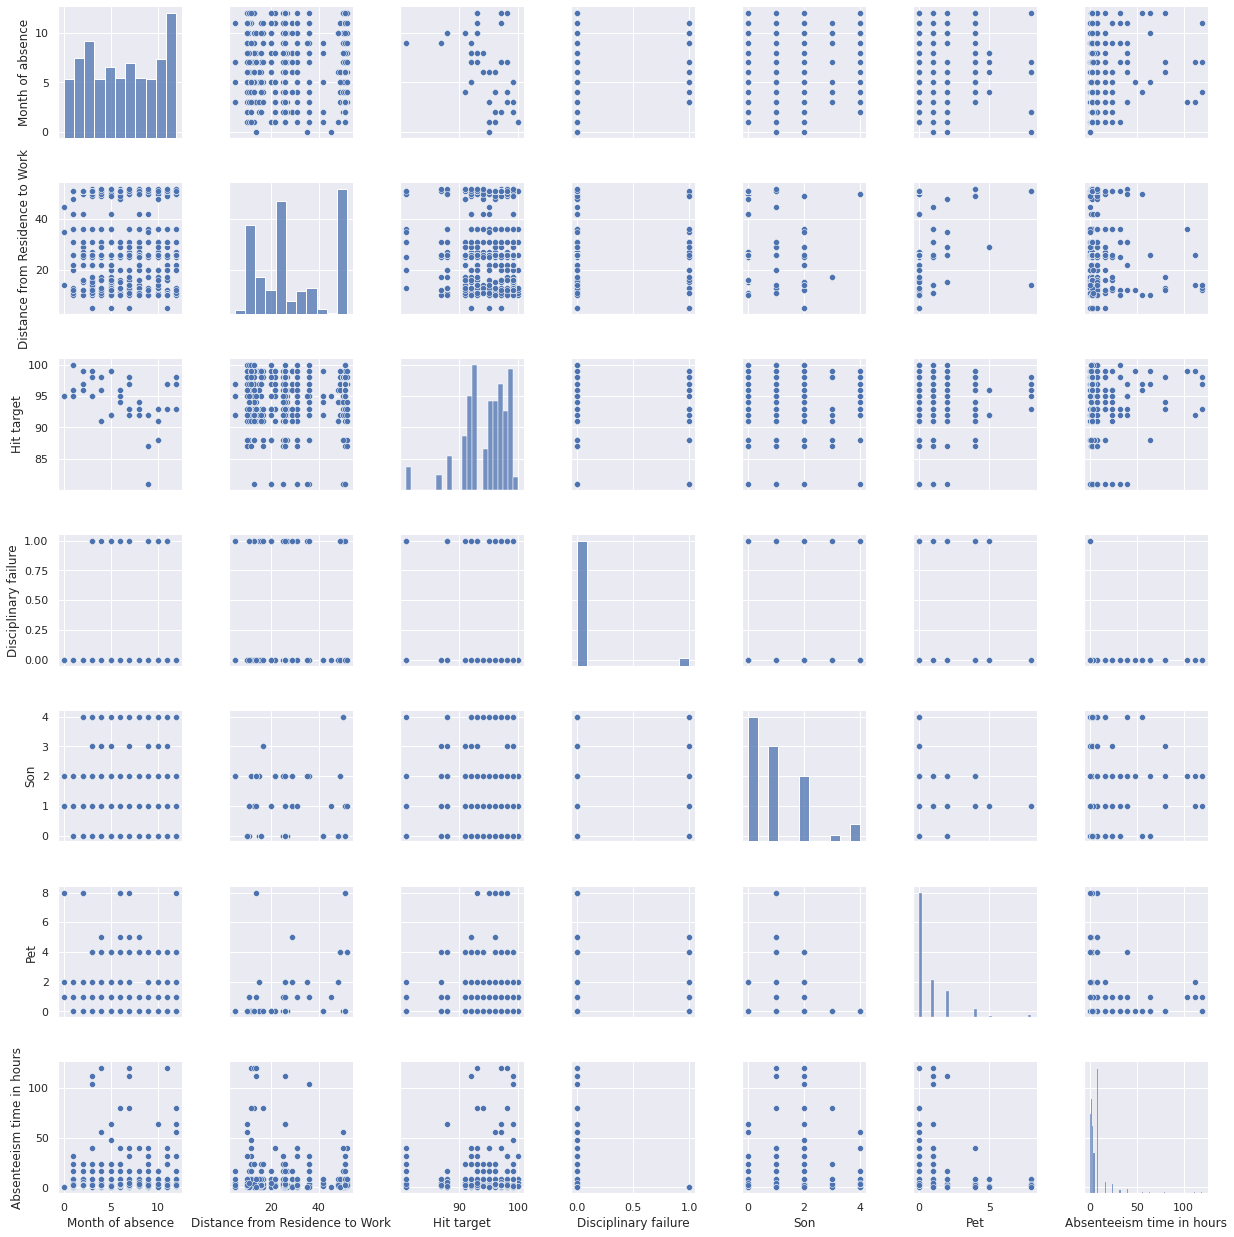

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

Train a series of KNN regression models with a range of K values. For each K value, use cross validation of the training set and find the average RMSE score. Make a plot of K versus average RMSE. What is the best value of K?

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#define your own mse and set greater_is_better=False
mse = make_scorer(mean_squared_error,greater_is_better=False, squared=False)
grid = {'n_neighbors':[1, 3, 5, 7, 9]}

result = GridSearchCV(KNeighborsRegressor(), grid, cv=5, scoring=mse)
result.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=0)

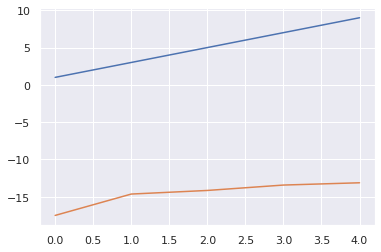

In [ ]:
plt.plot(grid['n_neighbors'])
plt.plot(result.cv_results_['mean_test_score'])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neighbors = [1, 3, 5, 7, 9]
train_errors = []
test_errors = []

for neighbor in neighbors:
    result = KNeighborsRegressor(n_neighbors=neighbor)
    result.fit(X_scaled_train, y_train)
    y_pred_train = result.predict(X_scaled_train)
    y_pred_test = result.predict(X_scaled_test)
    train_errors.append(mean_squared_error(y_train, y_pred_train, squared=False))
    test_errors.append(mean_squared_error(y_test, y_pred_test, squared=False))


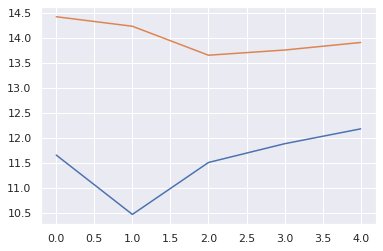

In [ ]:
plt.plot(train_errors)
plt.plot(test_errors)
plt.show()

Using your best K, fit a model to all your training data and show the RMSE for the training and testing sets.

In [ ]:
# answer below
result = KNeighborsRegressor(n_neighbors=2)
result.fit(X_scaled_train, y_train)
y_pred_train = result.predict(X_scaled_train)
y_pred_test = result.predict(X_scaled_test)

print("Root mean squared error training:", mean_squared_error(y_train, y_pred_train, squared=False))
print("Root mean squared error test:", mean_squared_error(y_test, y_pred_test, squared=False))

Root mean squared error training: 10.475457965864528
Root mean squared error test: 14.270966084080397


Create a homoscedasticity plot (also called residual plot). How is your model performing? What ideas do you have to improve the model?

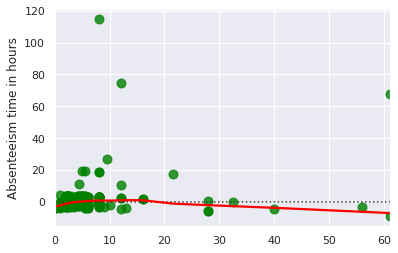

In [ ]:
# answer below
errors = y_test - y_pred_test
#Look at seaborn residplot documentation for more information about how to plot residuals on a feature basis. This may help in feature optimization.
sns.residplot(x=y_pred_test, y=errors,
              scatter_kws={"s": 80}, color='green', lowess=True, robust=True, 
              line_kws={'color': 'red'});
plt.show()

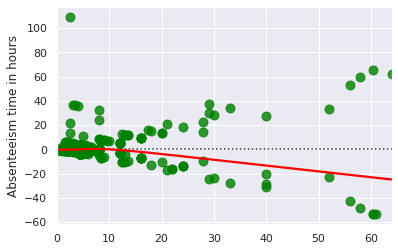

In [ ]:
# answer below
errors = y_train - y_pred_train
#Look at seaborn residplot documentation for more information about how to plot residuals on a feature basis. This may help in feature optimization.
sns.residplot(x=y_pred_train, y=errors,
              scatter_kws={"s": 80}, color='green', lowess=True, robust=True, 
              line_kws={'color': 'red'});
plt.show()

My model isn't performing well at all. I'd say I need to spend a little more time working with the data. I went on a bit of a spree and just normalized everything - without really taking into account how everything relates.

It's a KNN plot - so I guess it shouldn't really matter that none of my data is highly correlated to my target - absenteeism time in hours. 

It is highly correlated to the target hits variable, though. That thing had a VIF score of well over 600 and as I removed variables, the number just kept dropping. 

Wonder what the relationship was between all of those things. Oh well. 

I need help getting that gridsearchCV function to work so I don't go around running around in loops trying to figure out what value of K I should be using.